# Работа с целевой переменной
## Цель работы
Познакомиться с основными приемами обработки данных в отношении к целевой переменной: дискретизация, отбор признаков, устранение дисбаланса классов.

## Содержание работы
1. Загрузите первый датасет для регрессии и познакомьтесь с его структурой.
2. Постройте простую модель регрессии и оцените ее качество.
3. Отберите признаки, наиболее сильно влияющие на значение целевой переменной.
4. Постройте модель на оставшихся данных и оцените ее качество.
5. Загрузите второй датасет для регрессии и постройте распределение целевой переменной.
6. Сгруппируйте значения целевой переменной в категории. Постройте получившееся распределение.
7. Загрузите датасет для классификации. Постройте распределение целевой переменной.
8. Разделите датасет на тестовую и обучающую выборки, постройте и оцените baseline модель классификации.
9. Постройте ту же модель с применением весов классов. Сравните ее качество, сделайте выводы.
10. Выравняйте распределение классов путем оверсемплинга с повторением

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузите первый датасет для регрессии и познакомьтесь с его структурой.

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
df = fetch_openml("mtp", version=1)
df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


In [4]:
df.target.head()

0    0.000000
1    0.017173
2    0.035667
3    0.043593
4    0.044914
Name: oz203, dtype: float64

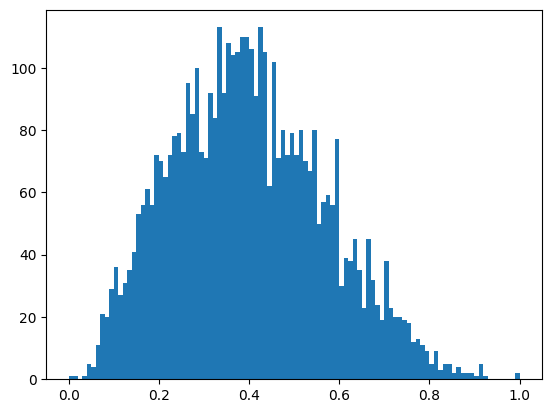

In [5]:
plt.hist(df.target, 100)
_ = plt.plot()

### 2. Постройте простую модель регрессии и оцените ее качество.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [8]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)

LinearRegression()

In [9]:
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340768694578

### 3. Отберите признаки, наиболее сильно влияющие на значение целевой переменной.

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

Text(0.5, 0, 'Feature Importance')

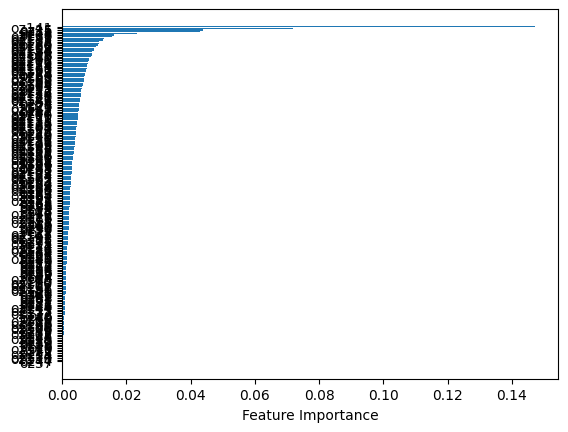

In [22]:
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [23]:
rf.feature_importances_[sort][-10:]

array([0.01155862, 0.01257425, 0.01287013, 0.01559577, 0.01606102,
       0.02321698, 0.04283049, 0.04391067, 0.07171325, 0.14703864])

In [24]:
df.data.columns[sort][-10:]

Index(['oz198', 'oz112', 'oz155', 'oz197', 'oz137', 'oz18', 'oz48', 'oz35',
       'oz15', 'oz141'],
      dtype='object')

In [25]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz195,oz170,oz153,oz8,oz180,oz154,oz158,oz109,oz162,oz20,oz198,oz112,oz155,oz197,oz137,oz18,oz48,oz35,oz15,oz141
0,0.056880,0.866163,0.052296,0.060606,0.002655,0.030205,0.800120,0.076923,0.319206,0.000000,0.039213,0.000000,0.752291,0.505899,0.000000,0.0625,0.312855,0.0,0.000000,0.041308
1,0.287438,0.866069,0.060922,0.373737,0.002581,0.016908,0.791224,0.153846,0.306084,0.242424,0.326584,0.222222,0.745984,0.683820,0.278945,0.0625,0.297041,0.4,0.282828,0.212274
2,0.117431,0.866224,0.072628,0.212121,0.002722,0.006922,0.798276,0.076923,0.406309,0.388889,0.204885,0.000000,0.753298,0.499219,0.000000,0.1250,0.288557,0.0,0.388889,0.063643
3,0.145349,0.865988,0.054593,0.171717,0.002473,0.001240,0.800965,0.076923,0.327848,0.095238,0.023469,0.000000,0.767469,0.630533,0.039437,0.0000,0.310692,0.1,0.111111,0.031193
4,0.067583,0.866283,0.045400,0.101010,0.002810,0.011829,0.802893,0.076923,0.329857,0.260870,0.111398,0.000000,0.741548,0.516053,0.000000,0.0625,0.286581,0.0,0.304348,0.063643


### 4. Постройте модель на оставшихся данных и оцените ее качество.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

In [27]:
better = LinearRegression()
better.fit(X_train, y_train)

LinearRegression()

In [28]:
print(bl_score)
better.score(X_test, y_test)

-1.6511340768694578


0.392061147688467

In [30]:
y_pred = better.predict(X_test)

### 5. Загрузите второй датасет для регрессии и постройте распределение целевой переменной.

### 6. Сгруппируйте значения целевой переменной в категории. Постройте получившееся распределение.

### 7. Загрузите датасет для классификации. Постройте распределение целевой переменной.

### 8. Разделите датасет на тестовую и обучающую выборки, постройте и оцените baseline модель классификации.

### 9. Постройте ту же модель с применением весов классов. Сравните ее качество, сделайте выводы.

### 10. Выравняйте распределение классов путем оверсемплинга с повторением

## Задания для самостоятельного выполнения

### 1. Исследуйте связь между количеством самых важных признаков, которые использует модель для обучения и тестовой точностью получившейся модели. Обучите несколько моделей с разным количеством наиболее важных признаков. Постройте график зависимости точности модели от количества признаков. Сделайте вывод.

### 2. Используйте другие методы отбора признаков:
- Исключение низкодисперсных признаков;
- Исключение по парным стаистическим критериям (хи-квадрат, тест Фишера, коэффициент корреляции, информационный критерий);
- Рекурсивное исключение признаков;
- Последовательное включение признаков;
- Исключение по L1-норме (гребневой регрессии).

### 3. Изучите возможности библиотеки imbalanced-learn. Примените на данном примере возможности данной библиотеки для оверсемплинга и андерсемплинга выборки.

### 4. Исследуйте влияние дискретизации целевой переменной на качество модели. Используйте уже продемострированный подход - построение базовой модели (baseline) и сравнение модели после обработки данных с базовой. Проверьте разное количество категорий, а также разные стратегии группировки. Сделайте выводы. Обратите внимание, что после биннинга целевой переменной она стала категориальной. А значит, задача превратилась в задачу классификации.